# Logistic Regression for Multiplex Embedding Reconstruction

# Set-up

## Imports

In [2]:
# --- Standard library ---
from datetime import datetime  # use in metadata
from IPython.display import display, Latex  # pretty display

# --- Scientific computing ---
import numpy as np  # linear algebra and numerical computation tools

# --- Network science ---
import networkx as nx  # graph tools

# --- Data handling & visualization ---
import pandas as pd  # dataframes
import seaborn as sns  # pyplot recipes and dataframe-forward descriptive plotting
import matplotlib.pyplot as plt  # graphics base
%matplotlib inline

from matplotlib.lines import Line2D  # base line object, helpful for custom legends

# --- Project source ---


# --- Miscellaneous ---
from tqdm.auto import tqdm  # progress bars

# Data pre-processing

In [3]:
# Tag formatting function
TAG_ = lambda metadata: "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

In [4]:
# Tag data
md_ex19 = {
    "PROJECT_ID": "EMB_ex19",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.1.1",
    "DATE": "20230125"
}
md_ex20 = {
    "PROJECT_ID": "EMB_ex20",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.1",
    "DATE": "20230126"
}

TAG_ex19 = TAG_(md_ex19)
TAG_ex20 = TAG_(md_ex20)

In [5]:
# Load dataframes
df_ex19 = pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex19}.csv", index_col="_UID")
df_ex20 = pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex20}.csv", index_col="_UID")

In [6]:
# Merge dataframes
## Annotate embedding mechanism (also proxy for experiment id)
df_ex19["embedding"] = ["N2V"]*len(df_ex19)
df_ex20["embedding"] = ["LE"]*len(df_ex20)

## Concatenate dataframes
df = pd.concat([df_ex19, df_ex20])

## Save record unique identifier (grouped by experiment)
df["_UID"] = df.index

## Reset index
df.index = range(len(df))

# Visualizations

Text(0.5, 20.80000000000001, '$\\theta$')

<Figure size 432x288 with 0 Axes>

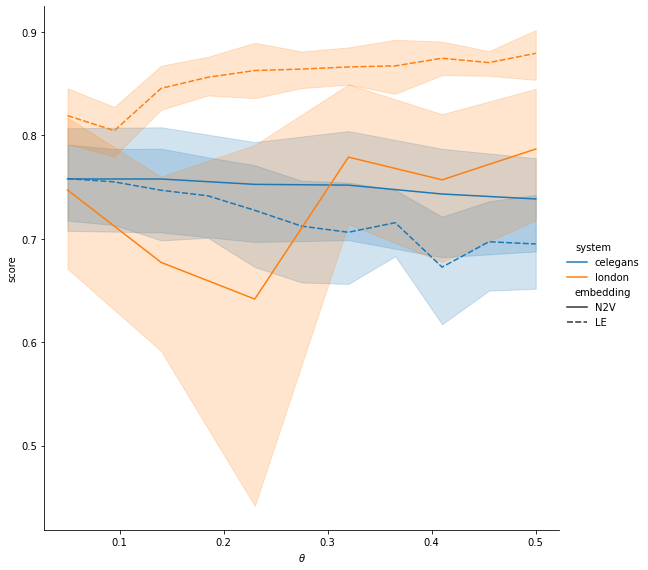

In [7]:
plt.figure()

sns.relplot(
    data=df, kind="line",
    x="theta", y="score",
    hue="system",
    style="embedding",
    height=8, aspect=1
)

plt.xlabel("$\\theta$")

Text(0.5, 20.80000000000001, '$\\theta$')

<Figure size 432x288 with 0 Axes>

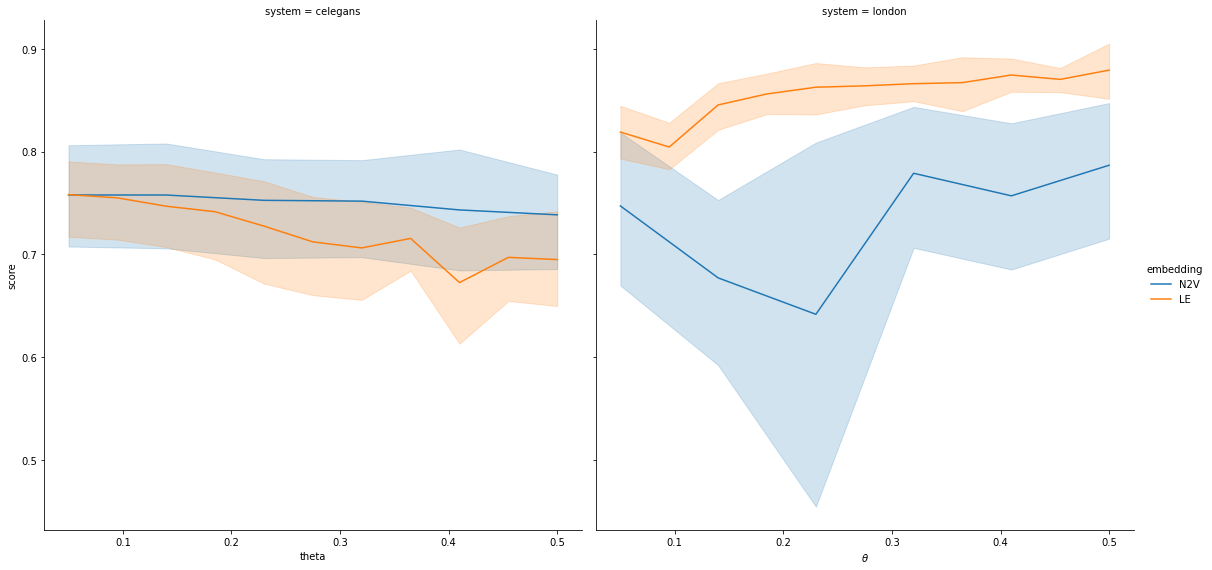

In [9]:
plt.figure()

sns.relplot(
    data=df, kind="line",
    x="theta", y="score",
    col="system",
    hue="embedding",
    height=8, aspect=1
)

plt.xlabel("$\\theta$")

<Figure size 432x288 with 0 Axes>

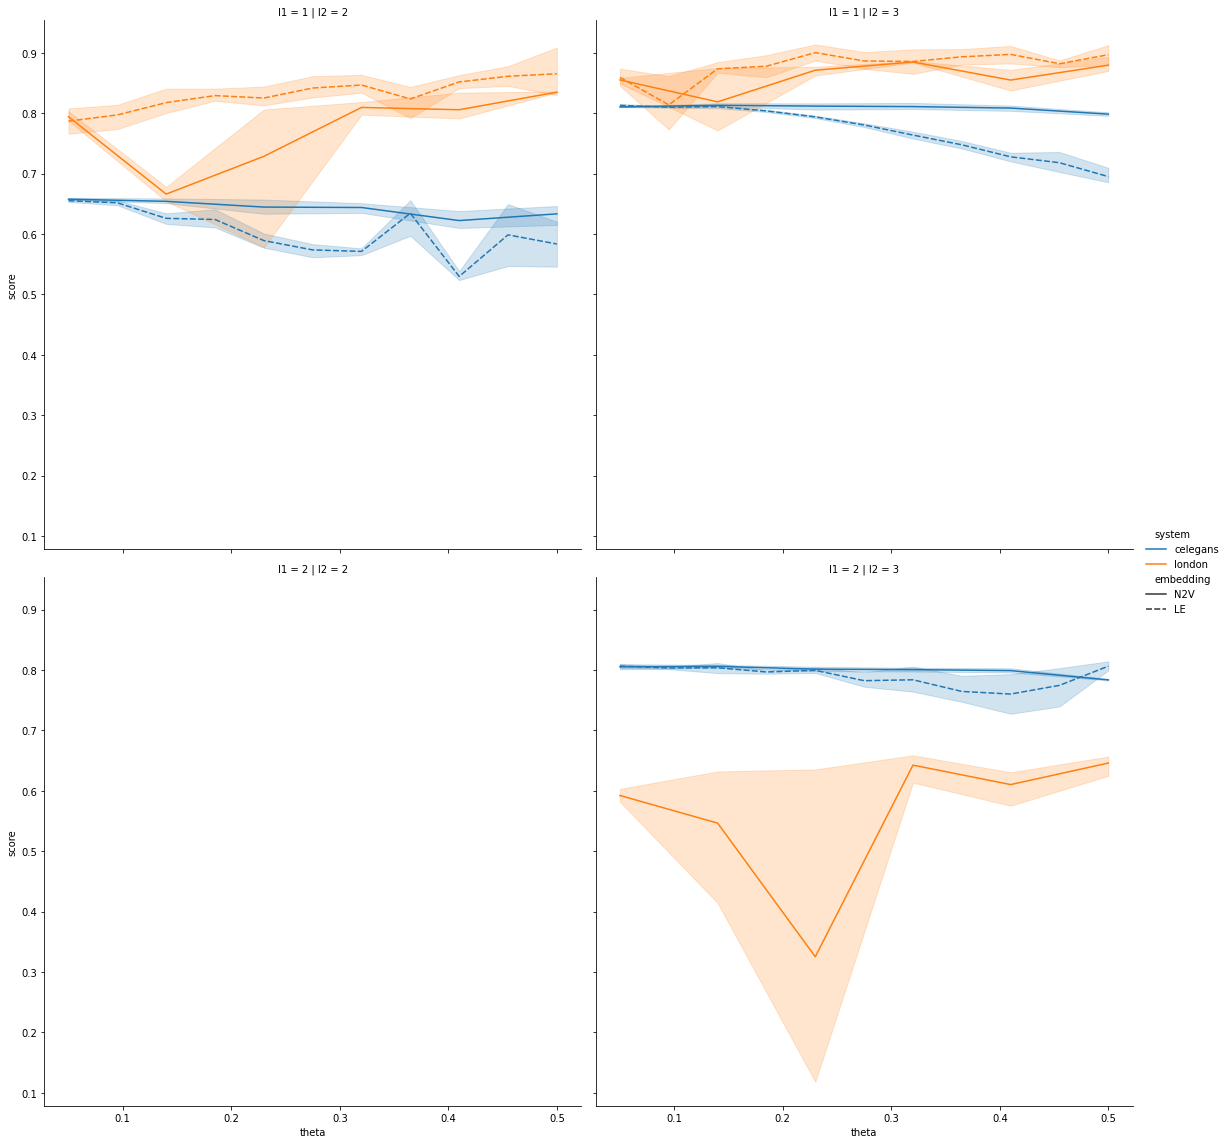

In [10]:
plt.figure()

sns.relplot(
    data=df, kind="line",
    x="theta", y="score",
    hue="system",
    style="embedding",
    row="l1", col="l2",
    height=8, aspect=1
)